REGRESIONES LINEALES PARA EL LAB 2
---

Descarga de librerias y lectura de datos
---

In [43]:
# El formato de archivo es de jupiter (".ipynb") 
# Descarga de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Lectura de los datos, en este caso en formato ".csv"
DATOS = pd.read_csv("/workspaces/First-repository/LAB 2/Lab 2_ Excel - Resistencia 1.csv")
# Elimino una columna vacia
DATOS = DATOS.drop (columns = "Unnamed: 2")
# Muestra los datos en formato de dataframe de pandas (primer libreria importada)
DATOS 
# Aclaración: Gracias a jupiter no se necesita el comando "print()", ya lo sobre entiende jupiter para la última linea de código
# Si lo trabajaras con el formato de archivo de pyton (".py") si sería necesario el "print()"


,Tiempo s Carga,Voltaje V Carga,Tiempo s Descarga,Voltaje V Descarga
0,0.10,1.97,0.01,1.47
1,0.50,1.95,1.05,1.45
2,1.00,1.93,2.18,1.40
3,2.00,1.88,4.18,1.35
4,3.14,1.83,6.03,1.30
5,4.26,1.77,8.03,1.25
6,6.10,1.71,9.21,1.20
7,7.18,1.65,11.15,1.15
8,9.06,1.60,13.14,1.10
9,10.24,1.54,15.25,1.05


RESISTENCIA 1 EN CARGA
---

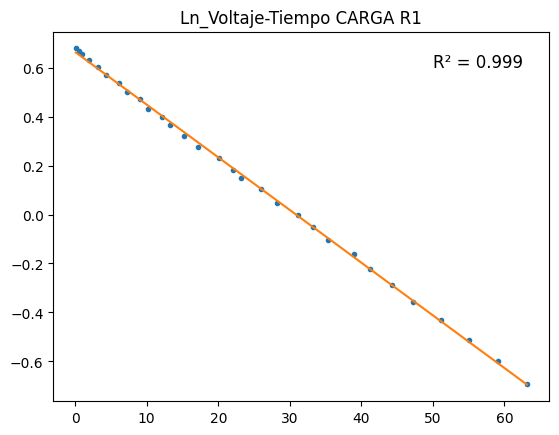

In [80]:
# Áca se selecciona las columnas de interes, "Tiempo s Carga" y "Voltaje V Carga" 
# Y se cambia su formato para numpy (La segunda libreria) se denominan array/s, distintos de pandas con sus dataframes
# Este formato de pandas son algo como listas de números o de textos (Esos ya no se como funcionan :p)
# Primero se pone la variable independiente y luego la dependiente
datos = DATOS[["Tiempo s Carga","Voltaje V Carga"]].to_numpy()
# Acá se les aplica el logaritmo natural a los datos de "Voltaje V Carga" ([:,1] <-- posición 1 en el arrays para la variable dependiente) y pasan a llamarse "datos_lin"
datos_lin = np.log(datos[:,1])
# Acá viene la regresión ([:,0] <-- Posición 0 en el arrays refiriendose a la independiente) , se hace con la cuarta libreria de scipy/stats
regresion = stats.linregress(datos[:,0],datos_lin)
# Hecha la regresión, se construye la gráfica con la tercer libreria "plt"
# Por otro lado, de la "regresion" se puede obtener el valor de R y nosotros le sacamos el cuadrado
R = regresion.rvalue
R2 = R ** 2
# Áca ponemos el valor de R² en la gráfica, plt.text(Posición en x, posición en y, texto, "fontsize=" tamaño letra , ¿color =?)
plt.text(50,0.6,f'R² = {R2:.3f}',fontsize = 12 , color = "black")
# [:,0] la independiente, datos_lin la dependiente , "ls=" no se que hace 
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
# Acá junta la regresión con la gráfica anterior
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
# El título
Titulo = "Ln_Voltaje-Tiempo CARGA R1"
plt.title(Titulo)
# El equivalente a "print()" para gráficas
plt.savefig(Titulo, dpi = 300)

plt.show()


RESISTENCIA 1 EN DESCARGA
--- 
Mismo analisis anterior pero sin los comentarios

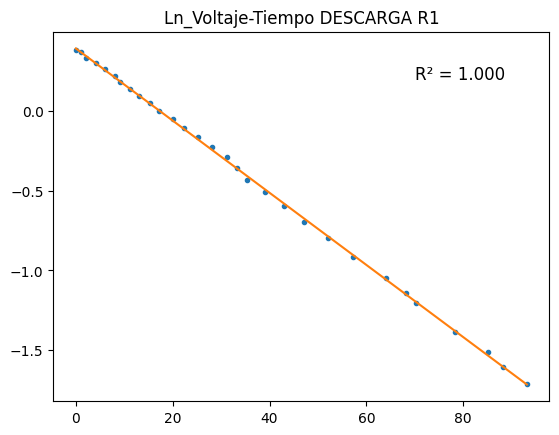

In [78]:
datos = DATOS[["Tiempo s Descarga","Voltaje V Descarga"]].to_numpy()
datos_lin = np.log(datos[:,1])
regresion = stats.linregress(datos[:,0],datos_lin)
R = regresion.rvalue
R2 = R ** 2
plt.text(70,0.2,f'R² = {R2:.3f}',fontsize = 12 , color = "black")
plt.plot(datos[:,0],datos_lin,ls="", marker = ".")
plt.plot(datos[:,0],regresion.slope*datos[:,0]+regresion.intercept)
plt.title("Ln_Voltaje-Tiempo DESCARGA R1")
plt.show()


ESTA PARTE PUEDE IGNORARSE, A MENOS QUE TENGAS CONOCIMIENTO AVANZADOS DE ESTADÍSTICA


In [54]:
X = sm.add_constant(DATOS["Tiempo s Descarga"])

model = sm.OLS(datos_lin, X).fit()
print(model.summary())

r_squared = model.rsquared
print(f'R²: {r_squared}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     6033.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           3.02e-34
Time:                        16:04:46   Log-Likelihood:                 65.257
No. Observations:                  30   AIC:                            -126.5
Df Residuals:                      28   BIC:                            -123.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6580      0.00

RESISTENCIA 2 EN CARGA
---

RESISTENCIA 2 EN DESCARGA
---

Script para actualizar las imagenes en el resumen
---

In [83]:
import os  
import shutil  

# Rutas de archivo  
ruta_imagen = '/workspaces/First-repository/LAB 2/Ln_Voltaje-Tiempo CARGA R1.png'  
ruta_markdown = '/workspaces/First-repository/LAB 2/Resumen.md'  
ruta_destino_markdown = '/workspaces/First-repository/LAB 2/Resumen.md'   # Ruta donde se espera la imagen en .md  

# Copiar la imagen actualizada  
shutil.copy(ruta_imagen, ruta_destino_markdown)  

# Para asegurarte de que el archivo markdown tenga la referencia correcta (Este paso es opcional)  
with open(ruta_markdown, 'r') as file:  
    content = file.read()  

# Escribir de nuevo el contenido en caso de que necesites actualizar algo  
with open(ruta_markdown, 'w') as file:  
    file.write(content)  

print("La imagen ha sido actualizada y se ha reflejado en el markdown.")  

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte